# PARCIAL 1 CORTE
### Jonathan Andres Mercado Chavarria 
1. Quitar la linea base 
2. Buscar el pico de cada pulso
3. calcular la carga 
4. aplicar el criterio de 
\begin{equation}\frac{Q}{p}\end{equation}
5. Hallar el delta tiempo


In [11]:
# Esta parte del codigo es para trabajar con la columna 1 lo cual en el trabajo se quitara la linea base de 50 ya hecho en los ejercicios anteriores y el tiempo 

import bz2
from numpy import zeros
from pylab import *

n = 0
lista=[]
lista_deltiempo=[]
#with bz2.open( input ("Please, enter the filename: "), "rt" ) as bz_file:

with bz2.open("Chitaga_2016_08_12_12h00.dat.bz2", "rt" ) as bz_file:

     for line in bz_file:
        rline = line.rstrip('\n').split(' ')
        if len(rline)==3:
            if rline[0]=="#":
                ln=0
                #lista.append(int(rline[3]))
            if rline[0]!="#":
                if ln >= 0: 
                 
                    lista.append(int(rline[0])-50) #quitando la linea base  de 50 
        if len(rline)==4:
            if rline[0]=="#" and rline[1]== "t":
                ln=0
                lista_deltiempo.append(int(rline[3])) # creando la lista de tiempo
                    
               # else:
                   # ln += 1                    
            #print( rline[0],rline[1],rline[2],)
            #print("lista",lista)
        n += 1
        #if n == 91:
           #break
            

In [5]:
#print("lista",lista)
#print(" lista del contador del tiempo es: ", lista_deltiempo)
print(" la longitud del el contador de tiempo", len(lista_deltiempo))
print((len(lista)-9), int(len(lista_deltiempo)) )

 la longitud del el contador de tiempo 749617
8995511 749617


In [34]:
# todos los valores separados en 12 en 12 y en una sola lista
# El siguiente codigo es para crear una lista con posiciones igual a la lista_deltiempo y este sea separado
#12 en 12 en otras sublistas, esto quiere decir que se crea una lista mayor y con las posiciones estan otras listas 
#pero llena de 12 datos 
def funcion(n,r,m):
    lista=[]
    for i in range(r,m):
        lista.append(n[i])
    return(lista)
n=0
n1=12
y1=int(len(lista)/12)-9
#print(y1)
tnuevo=[]
for i in range(y1):
    tnuevo.append(funcion(lista,n,n1))
    
    n=n+12
    n1=n1+12
#print("\n lista que separa los pulsos 12 datos: \n ",tnuevo)

# Aqui miramos los valores maximos de cada posicion de esta lista o sea los picos 
Picos=[]
for k in range(y1):
    Picos.append(max(tnuevo[k]))
#print("los valores maximos de picos son: ",Picos)
#print("\n la longitud de la lista de los picos: \n",len(Picos))
# codigo es para hallar los picos maximos los cuales estos se guardan en una lista con una longitud igual a la lista_deltiempo
# a la hora de imprimir la longitud de esta lista se dara cuentacon coiniciden con la 1 parte 
             


In [35]:
# AHora aplicamos el criterio q/p
# Hallemos el valor de cada Q  y lo guardaremos en una lista
#Aqui en esta parte del codigo vamos a hallar el alor de la carga Q en este caso lo hacemos con la suma de 12 datos 
#en cada posición y que deseo que se guarde en las posiciones de esta lista 
def funcion(n,r,m):
    lista=[]
    x=0
    for i in range(r,m):
        x=x+n[i]
    
    return(x)
n=0
n1=12
Q=[]
for i in range(y1):
    Q.append(funcion(lista,n,n1))
    n=n+12
    n1=n1+12
    
#print( "\n El valor de la carga  con valores con la linea base es: \n ",Q)
#print("la longitud del vector de la carga es: ",len(Q))


#hallemos el valor Q/P: en esta parte del codigo se aplica el criterio este codigo consiste en pedir la lista Q Y picos
# para si ver que señales se cumplen con este criterio  y ver que contadores de tiempo asociado  con estas señales se guardan
#por eso la lista de tiempo
qp=[]
qpno=[]
listadelttiem=[]
for i in range(y1):
    f=int(Q[i]/Picos[i])
    if f > 1:
        qp.append(f)
        listadelttiem.append(lista_deltiempo[i])
    else:
        qpno.append(f)

        
#print("\n Los siguientes valores en la lista son señales: \n",qp)
#print("\n la lista de contadores de tiempo que cumplen el criterio  anterior es: \n",listadelttiem)
#print("\n Los siguientes valores en la lista no son señales: \n",qpno)       
print(" el valor maximo es : ", max(qp))
#plot(qp)
#show()
#print()

 el valor maximo es :  9


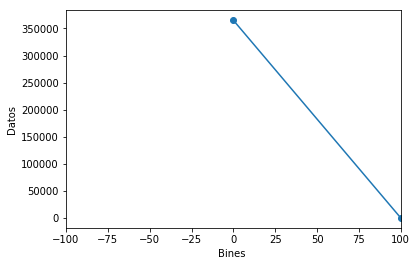

In [37]:

#AQUI SE TRABAJA CON EL HISTOGRAMA  para el criterio Q/P
 #Histograma 
hist = [] # Array for histogram
startBin = 0
endBin = 32000000
nbins = 320000
binwidth = int((endBin - startBin) / nbins)

[hist.append(0) for i in range(nbins)] # Inizialiting histo
#print(len(hist))
# Filling histogram
for j in qp:
    hist[ int((j)/binwidth) ] += 1



bines=[]
[bines.append((i)*binwidth) for i in range(nbins)]
# Histograma del criterio q/p
plot(bines, hist, 'o-')
xlabel('Bines ')
ylabel('Datos')
#yscale('log')
xlim(-100,100)
show()

El valor maximo es:  31259296


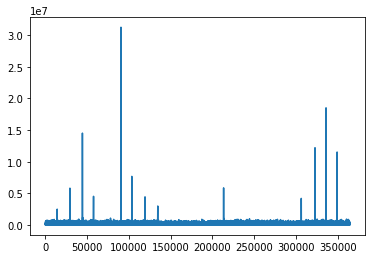

In [38]:
# Ahora se halla el delta tiempo
# Aquí en este codigo se trabaja con la lista de tiempo anterior y comenzar a restar la posicion adelantada con la atrasada
# y se toma solo los positivos
y=len(listadelttiem)
listadelta=[]
for i in range(y):
    if i+1 < y:
        x=listadelttiem[i+1]-listadelttiem[i]
        if x > 0 :
        #print(x)
            listadelta.append(x) #0.0010
#print("\n Los valores de la lista con la resta de los tiempos : \n", listadelta)
print("El valor maximo es: ",max(listadelta))
#print("El valor minimo es: ",min(listadelta))
plot(listadelta)
show()


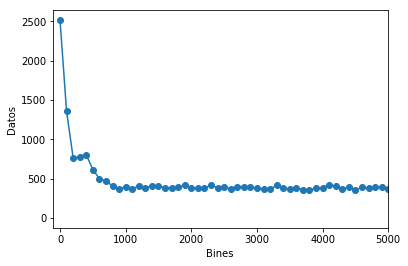

In [39]:
#Hallemos el  histograma para el delta de tiempo
 #Histograma 
hist1 = [] # Array for histogram
startBin = 0
endBin = 32000000
nbins = 320000
binwidth = int((endBin - startBin) / nbins)

[hist1.append(0) for i in range(nbins)] # Inizialiting histo
#print(len(hist1))
# Filling histogram
for j in listadelta :
    hist1[ int((j)/binwidth) ] += 1



bines1=[]
[bines1.append((i)*binwidth) for i in range(nbins)]
# Histograma del criterio q/p
plot(bines1, hist1, 'o-')
xlabel('Bines ')
ylabel('Datos')
#yscale('log')
xlim(-100,5000)
#ylim(1000,)
show()


## Explicación


1.En la 1 parte se quito la linea base que en este caso es 50 ya dectetado por los ejercicios anteriores hecho en clase y además se creo en una lista con esta nueva base, luego una lista de tiempo asociado con los contadores.

2.Ya resuelta la parte de los picos para cada pulso, estos picos maximos son mostrado sin el ruido  y se ven más claramente para trabajar

3.Se halla la carga para cada pulso dado por la formula siguiente  Q= \sum v(i), se aplica esto en nuestro codigo para hallar la carga para cada pulso 

4.luego se aplica el criterio Q/P pero para comparar con mayor con 1  y tomar , que pulso cumple el criterio anterior y guardarlo en una lista como se muestar en el codigo

5.En nuestro histograma del criterio Q/P  vemos que se presenta valores cercanos mayores de 1 hasta 9 eso muestra el histograma

6.luego hallemos el delta tiempo en nuestro histograma que muestra el tiempo es casi parecido a los valor maximo de la lista